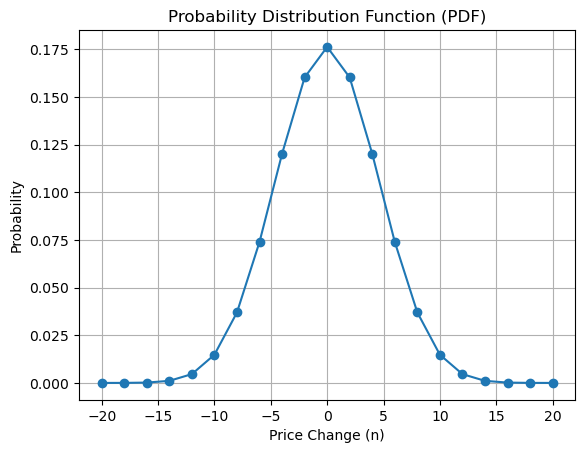

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def probabilityCalc(N, p):
    probabilities = []
    n_values = np.arange(-N, N+1, 2)
    for n in n_values:
        prob = comb(N, (N+n)//2) * (p ** ((N+n)//2)) * ((1-p) ** ((N-n)//2))
        probabilities.append(prob)
    return n_values, probabilities

def plot_pdf_line(N, p):
    n_values, probabilities = probabilityCalc(N, p)
    plt.plot(n_values, probabilities, marker='o')
    plt.xlabel('Price Change (n)')
    plt.ylabel('Probability')
    plt.title('Probability Distribution Function (PDF)')
    plt.grid(True)
    plt.show()

# Define parameters
N = 20  # Number of days
p = 0.5  # Probability of price going up by 1 unit

# Plot PDF
plot_pdf_line(N, p)


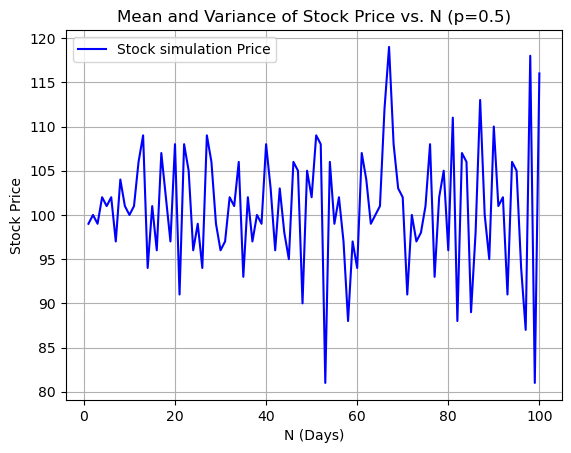

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_probability(N, n, p):
    if (N + n) % 2 != 0:  # If N and n have different parity, probability is 0
        return 0
    else:
        return np.math.comb(N, (N + n) // 2) * (p ** ((N + n) // 2)) * ((1 - p) ** ((N - n) // 2))


def simulate_stock_price(N, p, num_simulations):
    prices = []
    for _ in range(num_simulations):
        price = 100
        for _ in range(N):
            if np.random.rand() < p:
                price += 1
            else:
                price -= 1
        prices.append(price)
    return prices

    

# Part (a) - Plot PDF
N = 10  # Number of days
p = 0.5  # Probability of price going up

# Part (b) - Simulate stock price trend
N_values = range(1, 101)
mean_prices = []
var_prices = []
num_simulations = 1
stock_prices = []
prices=[]
for N in N_values:
    price = simulate_stock_price(N, p, num_simulations)
    mean_prices.append(np.mean(price))
    var_prices.append(np.var(price))    #FORMULA Obtained by
    prices.append(price)

plt.plot( N_values,prices , label='Stock simulation Price', color='blue')
plt.xlabel('N (Days)')
plt.ylabel('Stock Price')
plt.title('Mean and Variance of Stock Price vs. N (p=0.5)')
plt.legend()
plt.grid(True)
plt.show()

#SIMULATED VALUE WILL BE AROUND 100, refer : graph

In [ ]:
plt.plot(N_values, mean_prices, label='Mean Price', color='blue')
plt.plot(N_values, var_prices, label='Variance', color='red')
plt.xlabel('N (Days)')
plt.ylabel('Stock Price')
plt.title('Mean and Variance of Stock Price vs. N (p=0.5)')
plt.legend()
plt.grid(True)
plt.show()

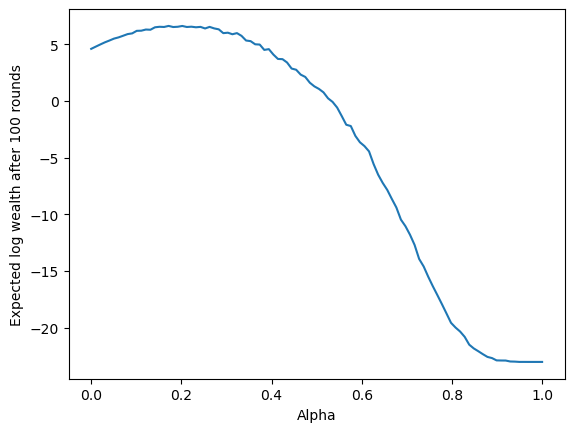

In [4]:
W = 100
# Probability of successful investment
p = 0.6
def f(a, W, p, N):
    w = W
    for _ in range(N):
        if np.random.rand() < p:
            w = a * (2 * w) + (1 - a) * w
        else:
            w = (1 - a) * w
    return w

# Function to calculate the logarithm of wealth after N rounds
def g(a, W, p, N):
    w = f(a, W, p, N)
    return np.log(w + 1e-10)

def h(W, p, N):
    alphas = np.linspace(0, 1, 100)
    expected_log_wealths = [np.mean([g(a, W, p, N) for _ in range(1000)]) for a in alphas]
    # Return the alpha with the maximum expected log wealth
    return alphas[np.argmax(expected_log_wealths)]

# Generate a range of alpha values
alphas = np.linspace(0, 1, 100)

expected_log_wealths = [np.mean([g(a, W, p, 100) for _ in range(1000)]) for a in alphas]

plt.plot(alphas, expected_log_wealths)
plt.xlabel('Alpha')
plt.ylabel('Expected log wealth after 100 rounds')
plt.show()
